In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 200
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5
250/250 [==============================] - 81s 321ms/step - loss: 1.6536 - accuracy: 0.3924 - val_loss: 1.3108 - val_accuracy: 0.5233
Epoch 2/5
250/250 [==============================] - 74s 297ms/step - loss: 1.2574 - accuracy: 0.5488 - val_loss: 1.0509 - val_accuracy: 0.6308
Epoch 3/5
250/250 [==============================] - 73s 290ms/step - loss: 1.0519 - accuracy: 0.6275 - val_loss: 0.8804 - val_accuracy: 0.6883
Epoch 4/5
250/250 [==============================] - 72s 287ms/step - loss: 0.9335 - accuracy: 0.6713 - val_loss: 0.8130 - val_accuracy: 0.7160
Epoch 5/5
250/250 [==============================] - 70s 282ms/step - loss: 0.8402 - accuracy: 0.7053 - val_loss: 0.7849 - val_accuracy: 0.7263
Test loss: 0.7848776578903198
Test accuracy: 0.7263000011444092


In [5]:
x_train.shape

(50000, 32, 32, 3)

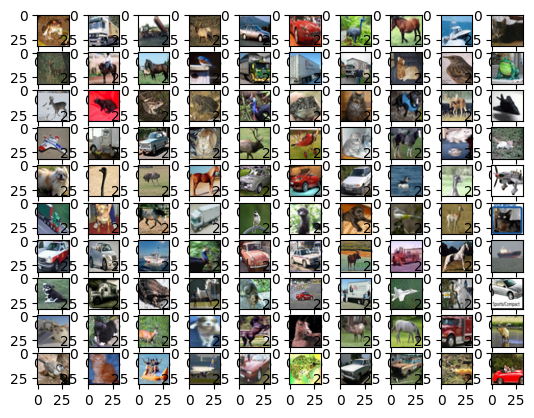

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(10,10)
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k+=1